# SuperStore Data Analysis

Analyzing orders data of the Sample SuperStore to figure out trends and patterns

In [78]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.reset_defaults()
sns.set_style('whitegrid')

In [79]:
# pd.set_option('display.max_rows',None)

**Loading Data**

1. Loading into DataFrame
1. Sort the values based on the order date
1. Check the number of records for each column and see the unique values

In [80]:
df_store = pd.read_excel(io='data/Sample_Superstore_Past.xls',sheet_name='Orders')
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [81]:
# Drop rowid --> data in file is not sorted based on order date
df_store.drop(labels='Row ID',axis=1,inplace=True)        

In [82]:
# Sort based on Order Date and reindex the dataframe
df_store.sort_values(by='Order Date',inplace=True)
df_store.reset_index(drop=True,inplace=True)
df_store.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [83]:
# Check datatype and number of entries
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [84]:
# Printing unique values
for col in df_store:
    print("\nUnique values for " + col + ':')
    if col == 'Order Date' or col == 'Ship Date':
        print(df_store[col].dt.year.unique())  # Instead of date check for the year
    else:
        print(df_store[col].unique())


Unique values for Order ID:
['CA-2014-103800' 'CA-2014-112326' 'CA-2014-141817' ... 'CA-2017-126221'
 'CA-2017-156720' 'CA-2017-143259']

Unique values for Order Date:
[2014 2015 2016 2017]

Unique values for Ship Date:
[2014 2015 2016 2017 2018]

Unique values for Ship Mode:
['Standard Class' 'First Class' 'Second Class' 'Same Day']

Unique values for Customer ID:
['DP-13000' 'PO-19195' 'MB-18085' 'ME-17320' 'JO-15145' 'LS-17230'
 'VS-21820' 'MS-17830' 'AJ-10780' 'SV-20365' 'CS-12250' 'BD-11605'
 'MM-17920' 'ND-18370' 'BS-11590' 'EH-13990' 'DL-13315' 'DW-13195'
 'TS-21340' 'XP-21865' 'MV-17485' 'MM-18280' 'HL-15040' 'TB-21400'
 'SG-20605' 'IM-15055' 'SD-20485' 'CA-11965' 'EJ-13720' 'JC-15340'
 'MV-18190' 'LC-17050' 'BD-11500' 'EB-13930' 'CD-12790' 'DB-13270'
 'MH-17440' 'ND-18460' 'CK-12760' 'NM-18445' 'GA-14725' 'NF-18385'
 'SC-20095' 'ML-17395' 'ST-20530' 'BF-11020' 'MN-17935' 'AB-10015'
 'TB-21595' 'LC-16930' 'SR-20740' 'TM-21010' 'SA-20830' 'MG-17875'
 'JH-15430' 'JS-16030' 'VF-2

**Frequency Calculation**

The dataset has multiple lines for one order pertaining to each line item. So, to find frequency of below attributes, we need to drop duplicates based on combination of OrderID and the corresponding attribute

1. Order Dates
1. Shipping Modes
1. Customers
1. Cities


<AxesSubplot:xlabel='Order Date'>

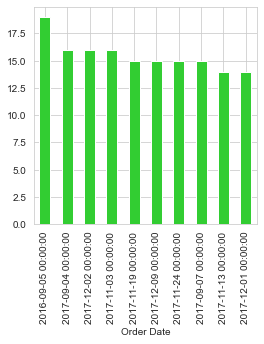

In [85]:
# Date on which orders were placed most --> 5th September 2016 was the Labour day and also most purchases are done in the month of holidays
%matplotlib inline
df_store.drop_duplicates(subset=['Order ID','Order Date']).groupby('Order Date')['Order Date']\
        .count().sort_values(ascending=False).head(10).plot(kind='bar',color='limegreen',figsize=(4,4))  

<AxesSubplot:xlabel='Ship Mode'>

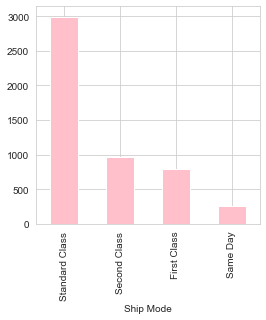

In [86]:
# Most Frequent Shipping Mode used
df_store.drop_duplicates(subset=['Order ID','Ship Mode']).groupby('Ship Mode')['Ship Mode'].count()\
        .sort_values(ascending=False).plot(kind='bar',color='pink',figsize=(4,4))

<AxesSubplot:xlabel='Customer ID'>

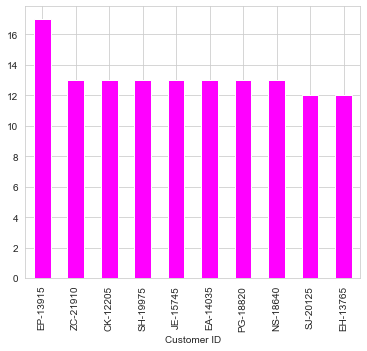

In [87]:
# Most Frequent Customer --> one customer placing different orders(meaning multiple different orders)
df_store.drop_duplicates(subset=['Order ID','Customer ID']).groupby('Customer ID')['Customer ID']\
        .count().sort_values(ascending=False).head(10).plot(kind='bar',color='magenta',figsize=(6,5))

<AxesSubplot:xlabel='Customer ID'>

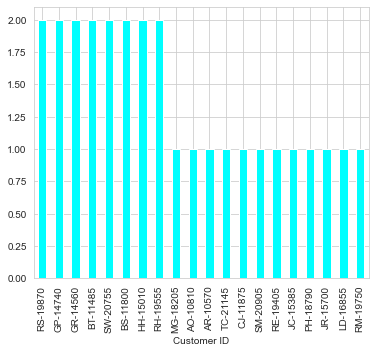

In [88]:
# least Frequent customers
df_store.drop_duplicates(subset=['Order ID','Customer ID']).groupby('Customer ID')['Customer ID']\
        .count().sort_values(ascending=False).tail(20).plot(kind='bar',color='aqua',figsize=(6,5))

<AxesSubplot:xlabel='City'>

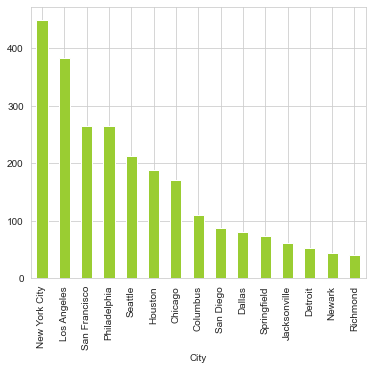

In [89]:
# From which city the orders have been placed most
df_store.drop_duplicates(subset=['Order ID','City']).groupby('City')['City']\
        .count().sort_values(ascending=False).head(15).plot(kind='bar',color='yellowgreen',figsize=(6,5))

In [90]:
# From which city the orders have been placed least
df_store.drop_duplicates(subset=['Order ID','City']).groupby('City')['City']\
        .count().sort_values(ascending=False).tail(300)

City
Loveland             3
Port Saint Lucie     3
Gulfport             3
Waynesboro           3
Sterling Heights     3
Beaumont             3
Mission Viejo        3
Boise                3
Pocatello            3
Garland              3
Georgetown           3
Palm Coast           3
Taylor               3
Cuyahoga Falls       3
Avondale             3
Medina               3
Medford              3
Evanston             3
Plantation           3
Overland Park        3
Escondido            3
Sparks               3
Corpus Christi       3
Marietta             3
Vallejo              3
West Palm Beach      3
Modesto              3
Rome                 3
Hattiesburg          3
Johnson City         3
Kenosha              3
Eagan                3
Highland Park        3
Round Rock           3
Wilson               3
Olympia              3
Cary                 3
Hesperia             3
Laguna Niguel        3
Rockville            3
Santa Clara          3
Cambridge            3
Woonsocket           3
Chico 

**Product Categories and State relation**

Finding out which sub-categories are bought most in which state --> using total qty. for each state

In [91]:
df_state_subcatg = df_store.groupby(by=['State','Sub-Category']).agg({'Quantity':'sum'})
df_state_subcatg.sort_values(by='Quantity',ascending=False).head(20)

Quantity
State        Sub-Category          
California   Paper             1091
             Binders           1057
             Furnishings        751
New York     Binders            696
California   Phones             691
             Art                644
             Storage            637
Texas        Binders            626
             Paper              572
California   Accessories        568
New York     Paper              565
California   Chairs             466
New York     Phones             393
Washington   Binders            365
New York     Furnishings        356
             Storage            356
California   Labels             349
             Appliances         346
New York     Art                336
Pennsylvania Binders            331

In [92]:
df_state_subcatg.loc['Wyoming']

,Quantity
Sub-Category,
Chairs,4


In [93]:
df_state_subcatg.reset_index(inplace=True)
df_state_subcatg.head()

,State,Sub-Category,Quantity
0,Alabama,Accessories,24
1,Alabama,Appliances,1
2,Alabama,Art,38
3,Alabama,Binders,41
4,Alabama,Chairs,30


In [94]:
df_state_subcatg1 = df_state_subcatg.pivot('State','Sub-Category','Quantity')
df_state_subcatg1.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Alabama,24.0,1.0,38.0,41.0,NaN,30.0,3.0,11.0,2.0,12.0,8.0,8.0,29.0,18.0,14.0,5.0,12.0
Arizona,85.0,21.0,47.0,155.0,18.0,52.0,NaN,28.0,23.0,82.0,9.0,9.0,124.0,79.0,78.0,16.0,36.0
Arkansas,43.0,NaN,27.0,42.0,9.0,9.0,NaN,8.0,13.0,23.0,1.0,NaN,36.0,19.0,8.0,NaN,2.0
California,568.0,346.0,644.0,1057.0,198.0,466.0,60.0,149.0,148.0,751.0,349.0,86.0,1091.0,691.0,637.0,145.0,281.0
Colorado,76.0,38.0,32.0,112.0,41.0,53.0,1.0,16.0,12.0,92.0,5.0,13.0,64.0,59.0,51.0,14.0,14.0


<AxesSubplot:xlabel='Sub-Category', ylabel='State'>

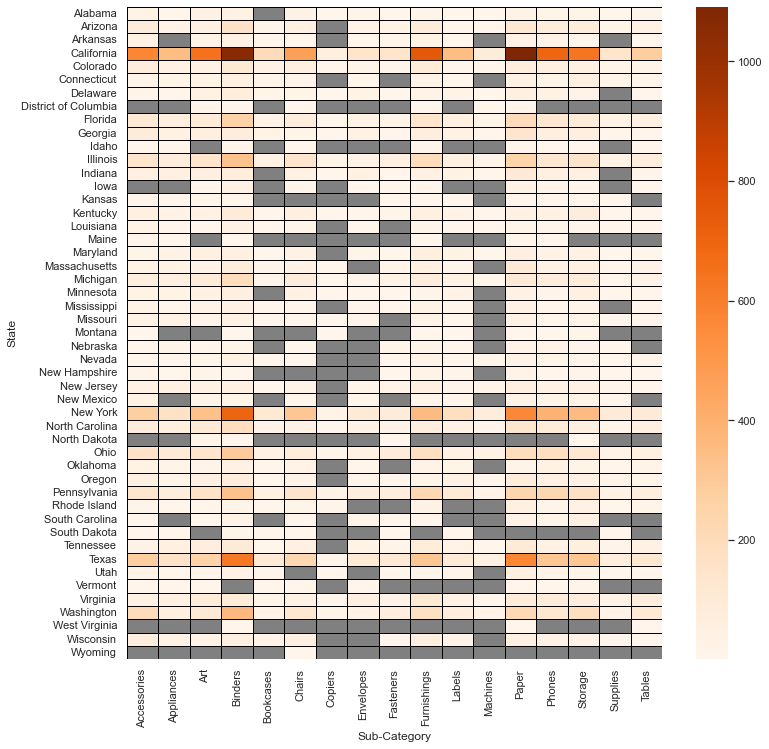

In [95]:
# Heatmap representation to identify which subcategories were bought most and minimum in which cities.
# Also, representing the subcategories which were not bought altogether in gray color
plt.figure(figsize=(12,12))
sns.set(rc={'axes.facecolor':'gray'})
sns.heatmap(df_state_subcatg1,cmap="Oranges",linecolor='black',linewidths=0.5,mask=df_state_subcatg1.isnull())

Paper is the most bought product in the store. Let's check which paper type product is most and least popular

In [96]:
# Identifying which type of Paper sold most. Need to group by productid also coz for ex- easy-staple paper was with different 
# product id's
df_store[df_store['Sub-Category']=='Paper'].groupby(['Product Name','Product ID'])['Quantity'].sum().sort_values(ascending=False)

Product Name                                                                                     Product ID     
Xerox 226                                                                                        OFF-PA-10003441    53
Xerox 1898                                                                                       OFF-PA-10002986    46
Xerox 1945                                                                                       OFF-PA-10000100    45
Xerox 216                                                                                        OFF-PA-10004100    42
Xerox 1988                                                                                       OFF-PA-10001125    41
Xerox 1919                                                                                       OFF-PA-10000675    40
Xerox 1909                                                                                       OFF-PA-10003641    40
Xerox 1893                                            

**Profit & Discounts on Paper**

--> Calculating unit price of each product without the discount</br>

--> Profit earned from different paper types</br>

--> Discount offered on each paper type</br>

In [97]:
# The unit_price will hold the actual selling price of the product
cond_list = [df_store['Discount'] == 0 , df_store['Discount'] > 0]
choice_list = [df_store['Sales']/df_store['Quantity'],df_store['Sales']/(df_store['Quantity']*(1-df_store['Discount']))]
df_store['unit_price'] = np.select(cond_list,choice_list)
df_store.tail(n=10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_price
9984,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,...,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3,0.2,22.6782,125.99
9985,CA-2017-158673,2017-12-29,2018-01-04,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Grand Rapids,Michigan,...,Central,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,209.700,2,0.0,100.6560,104.85
9986,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Michael Chen,Consumer,United States,New York City,New York,...,East,OFF-FA-10002988,Office Supplies,Fasteners,Ideal Clamps,6.030,3,0.0,2.9547,2.01
9987,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,12.95
9988,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110,104.65
9989,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,1.26
9990,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,21.99
9991,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,12.99
9992,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,8.69
9993,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,100.98


In [98]:
# Total profit earned from each paper product type - Papers that sold out least
df_store[df_store['Sub-Category']=='Paper'].groupby(['Product Name','Product ID'])[['Quantity','Profit']].sum()\
            .sort_values(by = 'Quantity',ascending=False).tail(20)

,,Quantity,Profit
Product Name,Product ID,,
Xerox 1958,OFF-PA-10002552,5,15.5520
Xerox 1983,OFF-PA-10001243,5,14.6510
Easy-staple paper,OFF-PA-10000565,5,137.1510
Loose Memo Sheets,OFF-PA-10001274,5,8.5775
"Wirebound Message Forms, Four 2 3/4 x 5 Forms per Page, Pink Paper",OFF-PA-10003205,5,14.2975
Rediform S.O.S. Phone Message Books,OFF-PA-10001450,4,9.7608
"Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate",OFF-PA-10001001,4,31.4712
Xerox 1902,OFF-PA-10001952,4,32.8896
Wirebound Voice Message Log Book,OFF-PA-10002109,4,4.9504


In [99]:
# get the second level index label values to get the product_ids(paper) which are being sold least
paper_sold_least = df_store[df_store['Sub-Category']=='Paper'].groupby(['Product Name','Product ID'])[['Quantity','Profit']].sum()\
            .sort_values(by = 'Quantity',ascending=False).tail(20).index.get_level_values(1)
# printing discount values of those product_id's
df_store[df_store['Product ID'].isin(paper_sold_least)][['Product ID','Discount']].sort_values(by='Product ID')

,Product ID,Discount
3842,OFF-PA-10000048,0.0
9369,OFF-PA-10000308,0.2
9157,OFF-PA-10000565,0.0
4730,OFF-PA-10000565,0.0
200,OFF-PA-10000919,0.0
4630,OFF-PA-10001001,0.2
1680,OFF-PA-10001166,0.2
7596,OFF-PA-10001166,0.2
7397,OFF-PA-10001166,0.0
6848,OFF-PA-10001166,0.2


In [100]:
# Total profit earned from each paper product type - Papers that sold out most
df_store[df_store['Sub-Category']=='Paper'].groupby(['Product Name','Product ID'])[['Quantity','Profit']].sum()\
            .sort_values(by = 'Quantity',ascending=False).head(20)

,,Quantity,Profit
Product Name,Product ID,,
Xerox 226,OFF-PA-10003441,53,155.7792
Xerox 1898,OFF-PA-10002986,46,120.7744
Xerox 1945,OFF-PA-10000100,45,756.2655
Xerox 216,OFF-PA-10004100,42,96.9408
Xerox 1988,OFF-PA-10001125,41,404.2890
Xerox 1919,OFF-PA-10000675,40,729.6220
Xerox 1909,OFF-PA-10003641,40,400.9760
Xerox 1893,OFF-PA-10001033,39,619.3589
Xerox 191,OFF-PA-10000157,39,354.2454


In [101]:
# get the second level index label values to get the product_ids(paper) which are being sold most
paper_sold_most = df_store[df_store['Sub-Category']=='Paper'].groupby(['Product Name','Product ID'])[['Quantity','Profit']].sum()\
            .sort_values(by = 'Quantity',ascending=False).head(20).index.get_level_values(1)
# printing discount values of those product_id's
df_store[df_store['Product ID'].isin(paper_sold_most)][['Product ID','Discount']].sort_values(by='Product ID').head()

,Product ID,Discount
1797,OFF-PA-10000019,0.0
9870,OFF-PA-10000019,0.2
5356,OFF-PA-10000019,0.0
5296,OFF-PA-10000019,0.0
4470,OFF-PA-10000019,0.0


**Get the Region's most profitable product**

In [102]:
df_store.groupby(by=['Region','Product ID'])['Profit'].sum().round(4).sort_values(ascending=False)

Region   Product ID     
East     TEC-CO-10004722    10079.9712
Central  TEC-CO-10004722     8399.9760
West     TEC-CO-10004722     6719.9808
South    OFF-BI-10003527     3812.9700
Central  OFF-BI-10000545     3804.9000
East     TEC-MA-10003979     3772.9461
         TEC-MA-10001047     3717.9714
         TEC-MA-10000045     3343.5360
West     OFF-BI-10003527     3050.3760
East     TEC-CO-10001449     3023.9496
         OFF-BI-10001359     2610.2409
         OFF-BI-10003527     2414.8810
Central  TEC-CO-10003763     2302.9671
West     TEC-CO-10003763     2267.9676
East     TEC-MA-10001127     2239.9872
West     TEC-CO-10001449     2183.9636
East     TEC-MA-10002927     1995.9900
West     TEC-AC-10002049     1938.7404
East     TEC-AC-10002049     1855.4652
South    TEC-MA-10001127     1854.9894
West     TEC-AC-10003870     1715.9480
Central  OFF-BI-10001120     1700.9910
East     TEC-MA-10003673     1668.2050
West     OFF-BI-10001120     1644.2913
         TEC-AC-10003832     1589.7207


In [103]:
df_store[(df_store['Region']=='East') & ((df_store['Product ID']=='TEC-CO-10004722') | (df_store['Product ID']=='TEC-MA-10003979') | (df_store['Product ID']=='TEC-MA-10001047') | (df_store['Product ID']=='TEC-MA-10000045') )]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_price
1093,CA-2014-160766,2014-09-14,2014-09-14,Same Day,DM-13015,Darrin Martin,Consumer,United States,New York City,New York,...,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,0.0,1371.9804,699.99
3512,CA-2015-114811,2015-11-08,2015-11-08,Same Day,KD-16495,Keith Dawkins,Corporate,United States,New York City,New York,...,East,TEC-MA-10000045,Technology,Machines,Zebra ZM400 Thermal Label Printer,4643.800,4,0.0,2229.0240,1160.95
3543,CA-2015-169796,2015-11-09,2015-11-14,Standard Class,Dp-13240,Dean percer,Home Office,United States,New York City,New York,...,East,TEC-MA-10000045,Technology,Machines,Zebra ZM400 Thermal Label Printer,2321.900,2,0.0,1114.5120,1160.95
4268,US-2016-143819,2016-03-01,2016-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,New York,...,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,0.0,2400.9657,699.99
4524,US-2016-107440,2016-04-16,2016-04-20,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,...,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818,1299.99
4742,CA-2016-143714,2016-05-23,2016-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968,3499.99
8832,CA-2017-143112,2017-10-05,2017-10-09,Standard Class,TS-21370,Todd Sumrall,Corporate,United States,New York City,New York,...,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",5199.960,4,0.0,1351.9896,1299.99
8986,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,3499.99
9334,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,3499.99


**Get the Regions worst performing product --> Giving no profit at all (profit in negative or 0)**

In [104]:
df_store.groupby(by=['Region','Product ID'])['Profit'].sum().round(4).sort_values(ascending=True)

Region   Product ID     
East     TEC-MA-10000418    -9239.9692
South    TEC-MA-10004125    -3839.9904
West     TEC-MA-10000822    -3399.9800
Central  OFF-BI-10004995    -3048.6176
South    FUR-TA-10000198    -2865.0960
         OFF-BI-10000545    -1978.5480
         TEC-MA-10002412    -1811.0784
Central  OFF-BI-10003527    -1525.1880
         OFF-AP-10002534    -1378.8216
South    OFF-BI-10004995    -1306.5504
East     OFF-SU-10002881    -1199.2464
Central  TEC-MA-10000822    -1189.9930
East     FUR-TA-10004154    -1187.5590
Central  OFF-BI-10004632    -1160.3235
         OFF-BI-10004584    -1147.0074
South    FUR-TA-10001889    -1111.4302
East     OFF-BI-10000545    -1065.3720
         TEC-MA-10001148    -1027.7004
South    FUR-TA-10001950     -968.8833
East     TEC-MA-10000864     -950.4000
West     TEC-MA-10001695     -938.2800
East     TEC-MA-10002210     -935.9595
Central  OFF-AP-10002651     -929.3913
West     FUR-BO-10001972     -802.0974
Central  OFF-SU-10000151     -786.0144


**Which product in which city is giving most profit**

In [105]:
df_store.groupby(by=['City','Product ID','Product Name'])['Profit'].sum().round(4).sort_values(ascending=False)

City               Product ID       Product Name                                                                                                                   
Lafayette          TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                                                                                              8399.9760
Seattle            TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                                                                                              6719.9808
Newark             TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                                                                                              5039.9856
Detroit            OFF-BI-10000545  GBC Ibimaster 500 Manual ProClick Binding System                                                                                   4946.3700
Minneapolis        OFF-BI-10001120  Ibico EPK-21 Electric Binding System                                                        

**Checking correlation between different variables**

<AxesSubplot:>

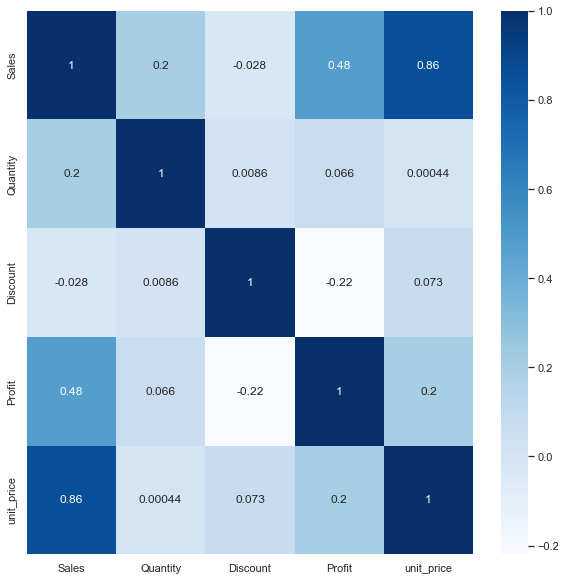

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(df_store.drop(columns='Postal Code').corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Sales')

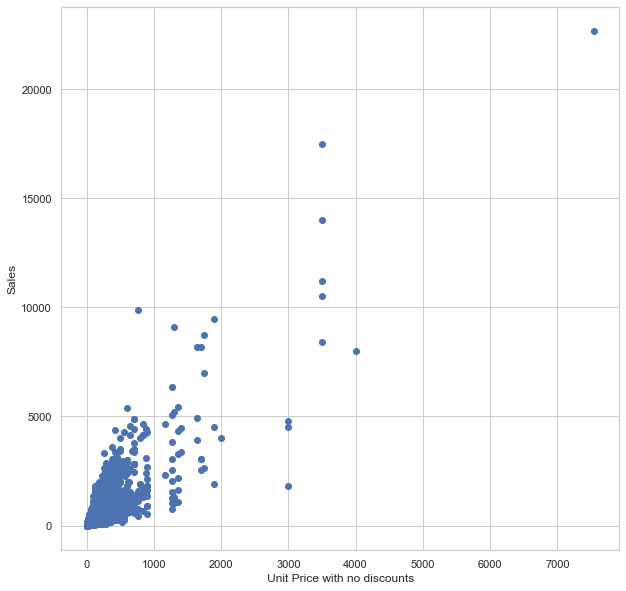

In [107]:
# How does unit price is affecting the sales
# sns.reset_defaults()
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.scatter(x='unit_price',y='Sales',data=df_store)
plt.xlabel('Unit Price with no discounts')
plt.ylabel('Sales')

**Identifying Customer Frequency**

In [108]:
df_products = df_store[['Customer ID', 'Product ID', 'Order Date']].sort_values(by=['Customer ID', 'Product ID', 'Order Date'])
df_products.head()

,Customer ID,Product ID,Order Date
1108,AA-10315,FUR-FU-10002456,2014-09-15
7853,AA-10315,OFF-AP-10000576,2017-06-29
279,AA-10315,OFF-AP-10002765,2014-03-31
281,AA-10315,OFF-BI-10004390,2014-03-31
7855,AA-10315,OFF-BI-10004654,2017-06-29


In [109]:
df_product_count = df_store[['Customer ID', 'Product ID', 'Order Date']].groupby(['Customer ID', 'Product ID']).count()
df_product_count[df_product_count['Order Date'] > 1].head()

Order Date
Customer ID Product ID                 
AB-10060    OFF-PA-10001970           2
AP-10915    OFF-PA-10001125           2
AS-10090    OFF-BI-10002393           2
AS-10630    OFF-LA-10001569           2
            OFF-LA-10003190           2

In [110]:
df_products.join(df_product_count[df_product_count['Order Date'] > 1], how='inner', on=['Customer ID', 'Product ID'], lsuffix='ab').head()

,Customer ID,Product ID,Order Dateab,Order Date
5408,AB-10060,OFF-PA-10001970,2016-09-01,2
5410,AB-10060,OFF-PA-10001970,2016-09-01,2
923,AP-10915,OFF-PA-10001125,2014-08-23,2
6461,AP-10915,OFF-PA-10001125,2016-12-10,2
3540,AS-10090,OFF-BI-10002393,2015-11-09,2


**Identifying if customers are increasing each month of each year**

In [111]:
# Churn rate - This store has customers increasing and we can see in the September, November and December they have most customers
df_store['order_month'] = df_store['Order Date'].dt.month
df_store['order_year'] = df_store['Order Date'].dt.year
df_store.drop_duplicates(subset=['order_year','order_month','Customer ID']).groupby(['order_year','order_month'])['Customer ID'].count()

order_year  order_month
2014        1               32
            2               27
            3               69
            4               64
            5               67
            6               63
            7               65
            8               70
            9              118
            10              75
            11             139
            12             134
2015        1               28
            2               36
            3               77
            4               69
            5               69
            6               68
            7               64
            8               64
            9              126
            10              79
            11             146
            12             141
2016        1               46
            2               42
            3               80
            4               83
            5               96
            6               90
            7               89
            8  

In [112]:
cust_jan_feb = set(df_store[(df_store['order_year']==2014) & (df_store['order_month'].isin([1,2]))]['Customer ID'])
cust_just_march = list(set(df_store[(df_store['order_year']==2014) & (df_store['order_month']==3)]['Customer ID']) - cust_jan_feb)
df_cust_just_march = df_store[df_store['Customer ID'].isin(cust_just_march)].head()

In [113]:
df_customer_counts = df_store.drop_duplicates(subset=['order_year','order_month','Customer ID']).groupby(['order_year','order_month'])['Customer ID'].count()

<AxesSubplot:title={'center':'Customer each month'}, xlabel='order_month'>

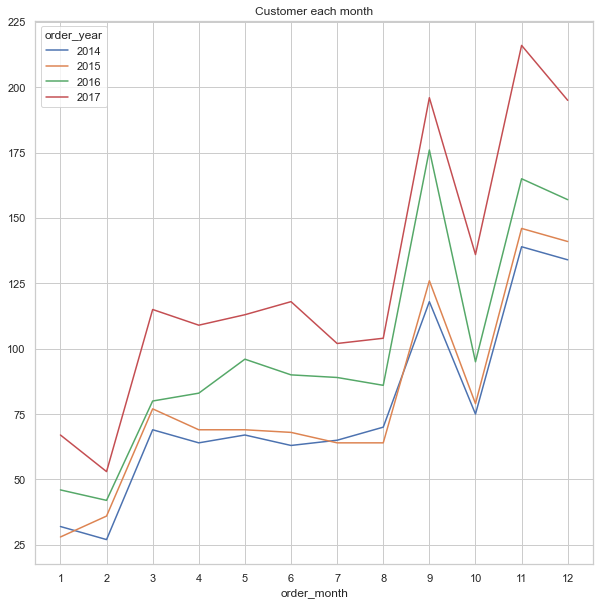

In [114]:
sns.set_style('whitegrid')
df_customer_counts.unstack(level=0).plot.line(grid=True,figsize=(10,10),xticks=range(1, 13),title='Customer each month')

**Identifying Customers who were not there before September**

In [115]:
mon = [1,2,3,4,5,6,7,8]
other_mon_cus = set(df_store[(df_store['order_month'].isin(mon)) & (df_store['order_year']==2014)]\
                .drop_duplicates(['Order ID','Customer ID'])['Customer ID'])

In [116]:
sep_cust = set(df_store[(df_store['order_month']==9) & (df_store['order_year']==2014)].drop_duplicates(['Order ID','Customer ID'])['Customer ID'])

In [117]:
# Total customers who came in september 2014
len(list(sep_cust - other_mon_cus))

68

In [118]:
list(sep_cust - other_mon_cus)

['LC-17140',
 'MR-17545',
 'CS-12400',
 'NP-18700',
 'PT-19090',
 'PF-19165',
 'AJ-10960',
 'TT-21220',
 'LW-17125',
 'MC-17275',
 'AS-10090',
 'FA-14230',
 'BM-11140',
 'DB-13615',
 'DL-12925',
 'DM-13015',
 'MC-18130',
 'JM-15535',
 'DN-13690',
 'LH-17020',
 'EA-14035',
 'SB-20185',
 'TH-21100',
 'PR-18880',
 'JK-15640',
 'VP-21760',
 'JG-15115',
 'GZ-14545',
 'KF-16285',
 'CC-12220',
 'TA-21385',
 'BN-11470',
 'HG-14965',
 'LW-17215',
 'SP-20620',
 'KC-16255',
 'LH-16750',
 'SF-20065',
 'SL-20155',
 'LT-16765',
 'AG-10765',
 'JC-15775',
 'RR-19525',
 'LD-17005',
 'EB-14170',
 'JA-15970',
 'KT-16465',
 'KW-16570',
 'JP-16135',
 'SM-20950',
 'SZ-20035',
 'KD-16495',
 'DM-12955',
 'MA-17995',
 'MS-17365',
 'JB-15400',
 'VG-21805',
 'DK-13375',
 'LR-17035',
 'NB-18580',
 'ON-18715',
 'MF-18250',
 'MT-18070',
 'BF-11005',
 'JD-16060',
 'ES-14020',
 'KD-16345',
 'TH-21115']

**Monthly average discount each year--> considering when discounts given**

<AxesSubplot:xlabel='order_month'>

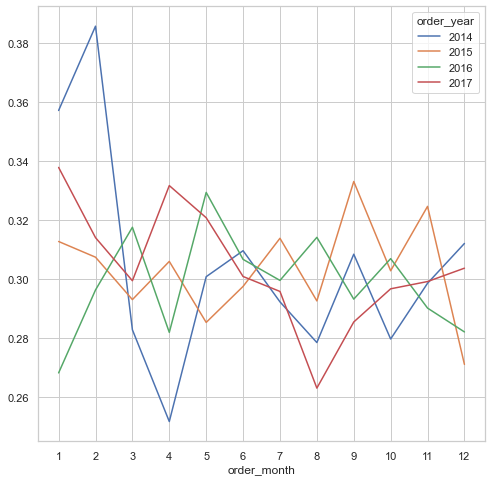

In [119]:
sns.set_style('whitegrid')
ser_monthly_discount = df_store.query('Discount > 0').groupby(by=['order_year','order_month'])['Discount'].mean()
df_monthly_discount = ser_monthly_discount.unstack(level=0)
df_monthly_discount.plot.line(figsize=(8,8),grid=True,xticks=range(1,13))

**Total number of discounts given each month**

<AxesSubplot:title={'center':'Discount given each year'}, xlabel='order_month'>

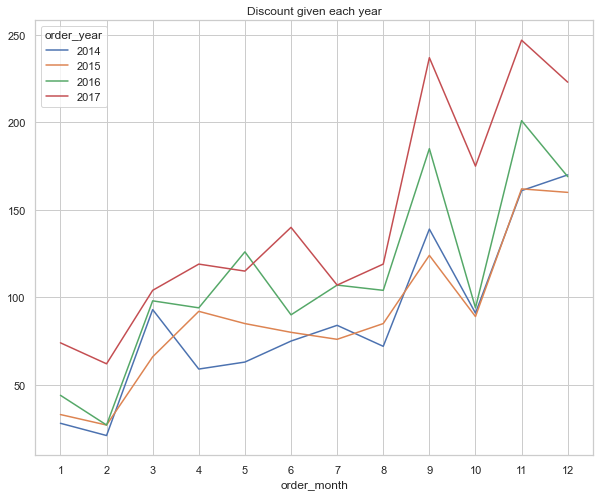

In [120]:
sns.set_style('whitegrid')
ser_monthly_discount1 = df_store.query('Discount > 0').groupby(by=['order_year','order_month'])['Discount'].count()
df_monthly_discount1 = ser_monthly_discount1.unstack(level=0)
df_monthly_discount1.plot.line(figsize=(10,8),grid=True,xticks=range(1,13),title='Discount given each year')

**Identifying customer buying only in September and November-->when discounts are given**

1. unique customers in september 2014
2. have bought in january 2014 and so on
3. check if customer buying only in sep 2014 also buying in september of all years

In [121]:
offer_period_cust = set(df_store[(df_store['order_year']==2014) & (df_store['order_month'].isin([9,11,12]))]['Customer ID'])
len(offer_period_cust)

332

In [122]:
months=[1,2,3,4,5,6,7,8,10]
other_month_customer = set(df_store[(df_store['order_year']==2014) & (df_store['order_month'].isin(months))]['Customer ID'])
offer_only_using_cust = list(offer_period_cust - other_month_customer)
print(offer_only_using_cust)
print(f'Total Customers buying in offer period: {len(offer_only_using_cust)}')

['LC-17140', 'KD-16270', 'NG-18430', 'AT-10435', 'PT-19090', 'MK-17905', 'AB-10600', 'DB-13615', 'MC-18130', 'DP-13165', 'RB-19330', 'GZ-14545', 'SP-20920', 'KM-16660', 'AH-10210', 'LT-16765', 'MO-17500', 'AG-10765', 'TR-21325', 'DK-13150', 'LD-17005', 'TB-21190', 'PB-19210', 'PO-18850', 'SZ-20035', 'KN-16390', 'TZ-21580', 'CS-11845', 'BF-11215', 'RM-19675', 'AJ-10960', 'AS-10090', 'AB-10165', 'TH-21235', 'DM-13015', 'JM-15535', 'JF-15190', 'TH-21100', 'HR-14830', 'TW-21025', 'DK-12985', 'AH-10075', 'KF-16285', 'BG-11035', 'LW-17215', 'JK-15730', 'CP-12085', 'MG-17890', 'YC-21895', 'SH-20635', 'SS-20140', 'KC-16255', 'CY-12745', 'JC-16105', 'KT-16465', 'ML-17410', 'SC-20680', 'SM-20950', 'PS-19045', 'KD-16495', 'DM-12955', 'MS-17365', 'DJ-13420', 'DK-13375', 'MF-17665', 'MF-18250', 'AR-10540', 'DC-13285', 'NB-18655', 'BF-11005', 'ES-14020', 'SF-20200', 'CM-11815', 'DM-13345', 'RE-19405', 'TH-21115', 'TC-20980', 'CS-12400', 'EC-14050', 'SM-20005', 'JD-16150', 'LH-17020', 'TC-21475', 'BT

In [123]:
offer_period_cust1 = set(df_store[df_store['order_month'].isin([9,11,12])]['Customer ID'])
len(offer_period_cust1)

740

In [124]:
other_month_customer1 = set(df_store[df_store['order_month'].isin(months)]['Customer ID'])
offer_only_using_cust1 = list(offer_period_cust1 - other_month_customer1)
offer_only_using_cust1

['NG-18430',
 'KC-16540',
 'BF-11080',
 'KB-16405',
 'SH-20635',
 'CD-12280',
 'TC-21145',
 'PC-18745',
 'DJ-13630',
 'AR-10345',
 'DK-13150',
 'RR-19315',
 'TB-21190',
 'CJ-11875',
 'JB-15925',
 'ER-13855',
 'GR-14560',
 'GH-14665',
 'AS-10135',
 'RE-19405']

In [125]:
# Check for month 9,11,12 with customers who have only the orders that has discount
# get these month customers
# Check if any of those customers even have a single order even with single item with no discount --> discard customer from consideration

df_cust_all = df_store[df_store['order_month'].isin([9,11,12])].groupby('Customer ID').count()
df_cust_discount = df_store[(df_store['order_month'].isin([9,11,12])) & (df_store['Discount'] > 0)].groupby('Customer ID').count()
df_cust_all_discount = df_cust_discount.join(df_cust_all, how='inner', on='Customer ID', rsuffix='all').query('Discount == Discountall')
df_cust_all_discount.index



Index(['AB-10165', 'AB-10600', 'AF-10885', 'AH-10120', 'AH-10195', 'AS-10045',
       'BD-11620', 'BE-11410', 'BF-11275', 'BG-11740',
       ...
       'SA-20830', 'SC-20845', 'SH-20635', 'SJ-20215', 'SV-20815', 'TB-21280',
       'TD-20995', 'TP-21565', 'TS-21610', 'VG-21805'],
      dtype='object', name='Customer ID', length=126)

In [126]:
list_only = list(set(df_cust_all_discount.index) - other_month_customer1)
list_only

['SH-20635', 'GH-14665', 'CJ-11875', 'RE-19405']

**Identifying Shipping Delays based on the Shipping mode used**

In [127]:
# A standatrd metric, to list down number of days shipping should take based on the shipping mode
cond_list_shipmode = [df_store['Ship Mode'] == 'Same Day', df_store['Ship Mode'] == 'First Class', 
                       df_store['Ship Mode'] == 'Second Class',df_store['Ship Mode'] == 'Standard Class']
choice_list_shipmode = [0,1,3,6]
df_store['taken_ship_days'] = (df_store['Ship Date'] - df_store['Order Date']).dt.days
df_store['required_ship_days'] = np.select(cond_list_shipmode,choice_list_shipmode)

In [128]:
df_store.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,unit_price,order_month,order_year,taken_ship_days,required_ship_days
9989,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,Bagged Rubber Bands,3.024,3,0.2,-0.6048,1.26,12,2017,4,6
9990,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,21.99,12,2017,4,6
9991,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,12.99,12,2017,4,6
9992,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,8.69,12,2017,4,6
9993,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,100.98,12,2017,4,6


In [129]:
# Creating column to store the ship status
cond_list_shipstatus = [(df_store['taken_ship_days'] > df_store['required_ship_days']),
                        (df_store['taken_ship_days'] == df_store['required_ship_days']), 
                        (df_store['taken_ship_days'] < df_store['required_ship_days'])]
choice_list_shipstatus = ['Late','On-Time','Early']
df_store['ship_status'] = np.select(cond_list_shipstatus,choice_list_shipstatus)
df_store.tail(20)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,unit_price,order_month,order_year,taken_ship_days,required_ship_days,ship_status
9974,US-2017-162068,2017-12-28,2017-12-31,Second Class,PC-18745,Pamela Coakley,Corporate,United States,Loveland,Colorado,...,1.188,2,0.7,-0.9900,1.98,12,2017,3,3,On-Time
9975,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,...,34.580,1,0.0,10.0282,34.58,12,2017,3,3,On-Time
9976,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,...,12.530,1,0.0,5.8891,12.53,12,2017,3,3,On-Time
9977,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,...,1207.840,8,0.0,314.0384,150.98,12,2017,3,3,On-Time
9978,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,...,258.750,3,0.0,77.6250,86.25,12,2017,3,3,On-Time
9979,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,...,300.980,1,0.0,87.2842,300.98,12,2017,3,3,On-Time
9980,CA-2017-130631,2017-12-29,2018-01-02,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,Washington,...,68.460,2,0.0,20.5380,34.23,12,2017,4,6,Early
9981,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,...,393.568,4,0.2,-44.2764,122.99,12,2017,4,6,Early
9982,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,...,101.120,8,0.0,37.4144,12.64,12,2017,7,6,Late
9983,CA-2017-130631,2017-12-29,2018-01-02,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,Washington,...,19.600,5,0.0,9.6040,3.92,12,2017,4,6,Early


In [130]:
df_shipments = df_store.groupby(['Order ID','Sub-Category']).agg({
    'State': 'first',
    'order_month':'first',
    'order_year' : 'first',
    'taken_ship_days' : 'first',
    'required_ship_days' : 'first',
    'ship_status' : 'first'
})
df_shipments.head()

State  order_month  order_year  \
Order ID       Sub-Category                                        
CA-2014-100006 Phones          New York            9        2014   
CA-2014-100090 Binders       California            7        2014   
               Tables        California            7        2014   
CA-2014-100293 Paper            Florida            3        2014   
CA-2014-100328 Binders         New York            1        2014   

                             taken_ship_days  required_ship_days ship_status  
Order ID       Sub-Category                                                   
CA-2014-100006 Phones                      6                   6     On-Time  
CA-2014-100090 Binders                     4                   6       Early  
               Tables                      4                   6       Early  
CA-2014-100293 Paper                       4                   6       Early  
CA-2014-100328 Binders                     6                   6     On-Time

In [131]:
df_shipments1 = df_shipments.reset_index()
df_shipments1.head()

,Order ID,Sub-Category,State,order_month,order_year,taken_ship_days,required_ship_days,ship_status
0,CA-2014-100006,Phones,New York,9,2014,6,6,On-Time
1,CA-2014-100090,Binders,California,7,2014,4,6,Early
2,CA-2014-100090,Tables,California,7,2014,4,6,Early
3,CA-2014-100293,Paper,Florida,3,2014,4,6,Early
4,CA-2014-100328,Binders,New York,1,2014,6,6,On-Time


In [132]:
df_shipments1.shape

(9159, 8)

In [133]:
df_shipments2 = pd.DataFrame({
    'State' : df_shipments1['State'],
    'Sub-Category' : df_shipments1['Sub-Category']    
})
df_shipments2.drop_duplicates(inplace=True)

In [134]:
ser_stotal = df_shipments1.groupby(['State', 'Sub-Category']).count()['ship_status']
ser_searly = df_shipments1[df_shipments1['ship_status'] == 'Early'].groupby(['State', 'Sub-Category']).count()['ship_status']
ser_stime = df_shipments1[df_shipments1['ship_status'] == 'On-Time'].groupby(['State', 'Sub-Category']).count()['ship_status']
ser_slate = df_shipments1[df_shipments1['ship_status'] == 'Late'].groupby(['State', 'Sub-Category']).count()['ship_status']

In [135]:
df_shipments2 = df_shipments2.merge((ser_searly * 100 / ser_stotal), right_index=True, left_on=['State', 'Sub-Category']).rename(columns={'ship_status': 'percent_early'}) \
    .merge((ser_stime * 100 / ser_stotal), right_index=True, left_on=['State', 'Sub-Category']).rename(columns={'ship_status': 'percent_on_time'}) \
    .merge((ser_slate * 100 / ser_stotal), right_index=True, left_on=['State', 'Sub-Category']).rename(columns={'ship_status': 'percent_late'})

In [136]:
df_shipments2[df_shipments2['percent_late'].isnull()].head()

,State,Sub-Category,percent_early,percent_on_time,percent_late
121,Mississippi,Storage,75.000000,25.000000,NaN
122,Mississippi,Tables,100.000000,NaN,NaN
123,Delaware,Machines,NaN,100.000000,NaN
125,Utah,Furnishings,33.333333,66.666667,NaN
171,Montana,Binders,66.666667,33.333333,NaN


<AxesSubplot:xlabel='Sub-Category', ylabel='State'>

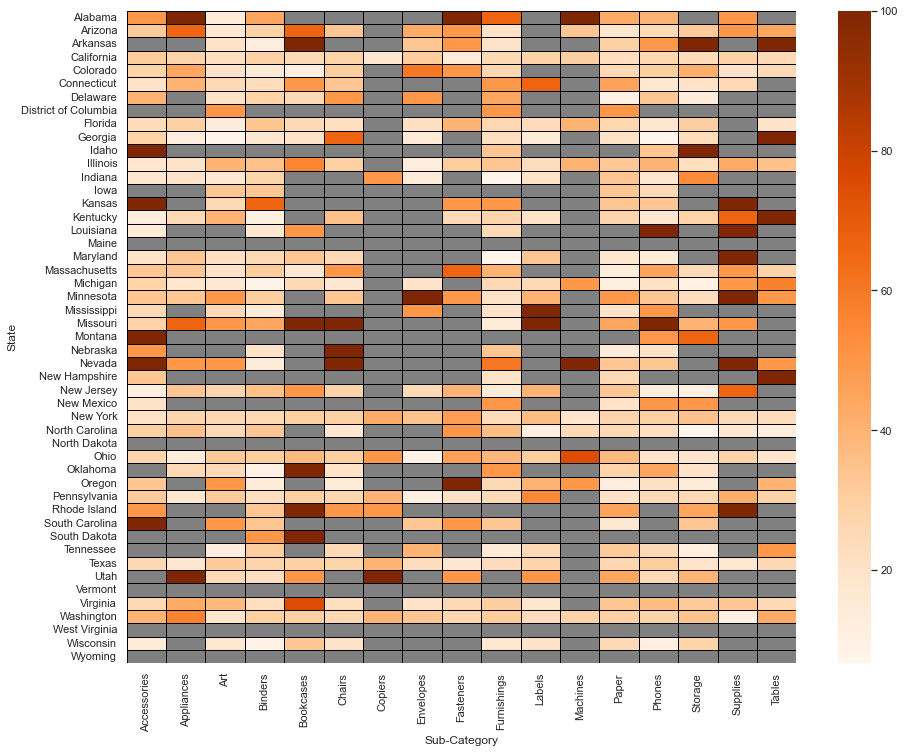

In [137]:
# Late Deliveries Heat map
plt.figure(figsize=(15, 12))
df_pivot_late = df_shipments2.pivot('State','Sub-Category','percent_late')
sns.set(rc={'axes.facecolor':'gray'})
sns.heatmap(df_pivot_late,cmap="Oranges",linecolor='black',linewidths=0.5, mask=df_pivot_late.isnull())

In [138]:
df_shipments1[(df_shipments1['State']=='Alabama') & (df_shipments1['Sub-Category']=='Appliances')]

,Order ID,Sub-Category,State,order_month,order_year,taken_ship_days,required_ship_days,ship_status
3897,CA-2016-127208,Appliances,Alabama,6,2016,3,1,Late


In [139]:
df_random = df_store.drop_duplicates(['Order ID','Customer ID']).groupby('Customer ID')
# df_random.groups
df_low_orders = df_random.size().sort_values().reset_index()
df_low_orders.rename(columns={0: 'no_of_orders'},inplace=True)

In [140]:
df_low_orders.head(2)

,Customer ID,no_of_orders
0,CJ-11875,1
1,RM-19750,1


In [141]:
low_order_list = list(df_low_orders[df_low_orders['no_of_orders'] < 2]['Customer ID'])
df_ran2 = df_store[df_store['Customer ID'].isin(low_order_list)].sort_values(['Order ID','Customer ID'])

<AxesSubplot:ylabel='Order ID'>

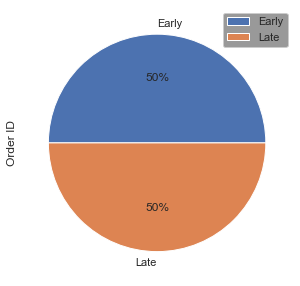

In [142]:
df_ran2.drop_duplicates(subset=['Order ID']).groupby('ship_status').count()['Order ID']\
        .plot.pie(y='Order ID',autopct=lambda p:'{:.0f}%'.format(p),legend=True,figsize=(5,5))

<AxesSubplot:ylabel='Order ID'>

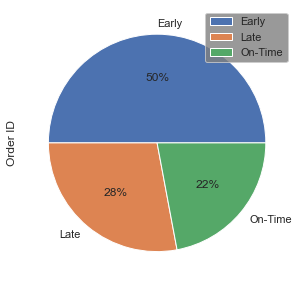

In [143]:
moderate_order_list = list(df_low_orders[(df_low_orders['no_of_orders'] == 2) & (df_low_orders['no_of_orders'] < 5)]['Customer ID'])
df_ran3 = df_store[df_store['Customer ID'].isin(moderate_order_list)].sort_values(['Order ID','Customer ID'])
df_ran3.drop_duplicates(subset=['Order ID']).groupby('ship_status').count()['Order ID']\
        .plot.pie(y='Order ID',autopct=lambda p:'{:.0f}%'.format(p),legend=True,figsize=(5,5))

<AxesSubplot:ylabel='Order ID'>

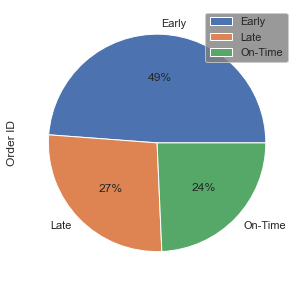

In [144]:
high_order_list = list(df_low_orders[(df_low_orders['no_of_orders'] > 4)]['Customer ID'])
df_ran4 = df_store[df_store['Customer ID'].isin(high_order_list)].sort_values(['Order ID','Customer ID'])
# tot_ord = df_ran4.drop_duplicates(subset=['Order ID'])['Order ID'].count()
df_ran4.drop_duplicates(subset=['Order ID']).groupby('ship_status').count()['Order ID']\
        .plot.pie(y='Order ID',autopct = lambda p : '{:.0f}%'.format(p),legend=True,figsize=(5,5))

**Plotting quantities sold for each sub-categories at no discounts and with different discount percentages**

In [145]:
df_store[df_store['Discount']==0].groupby('Sub-Category')['Sub-Category'].count()

Sub-Category
Accessories    471
Appliances     271
Art            498
Binders        337
Bookcases       60
Chairs         133
Copiers         22
Envelopes      152
Fasteners      128
Furnishings    571
Labels         239
Machines        29
Paper          857
Phones         311
Storage        530
Supplies       117
Tables          72
Name: Sub-Category, dtype: int64

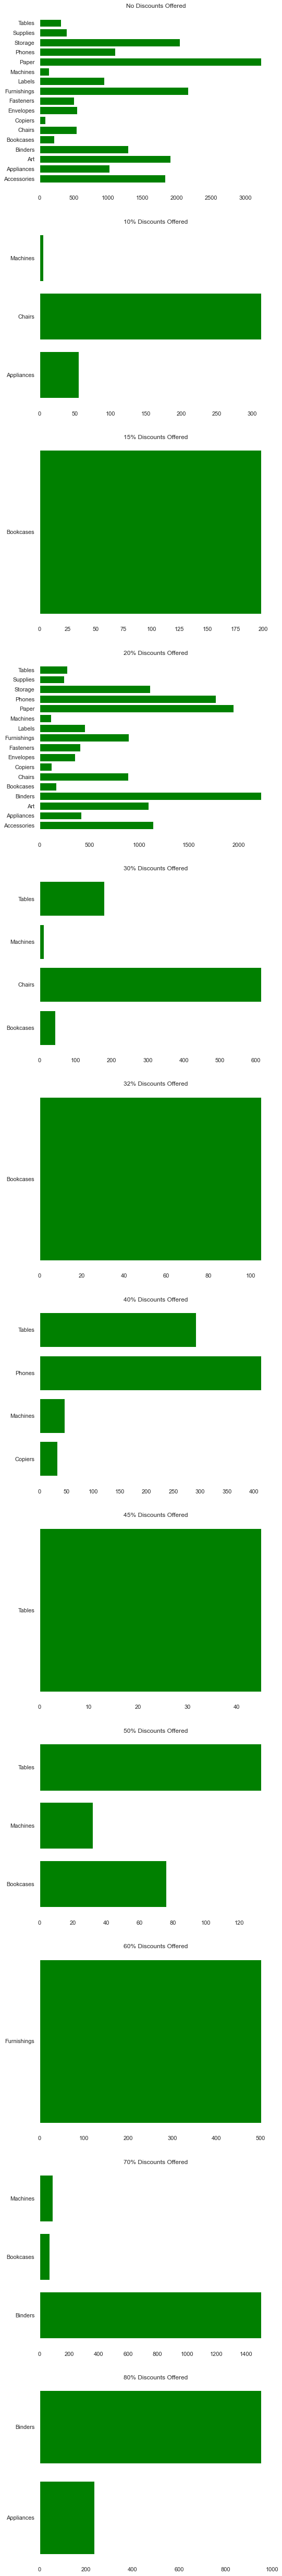

In [146]:
fig,ax2 = plt.subplots(12,1,figsize=(8,90))
# No Discounts Offered
df_0 = df_store[df_store['Discount']==0].groupby('Sub-Category')['Quantity'].sum()
df_0_xvalue = df_0.index
df_0_yvalue = df_0.to_list()
ax2[0].barh(df_0_xvalue,df_0_yvalue,color='green')
ax2[0].set_title('No Discounts Offered')
ax2[0].set_facecolor('white')

# 10% Discount Offered
df_10 = df_store[df_store['Discount']==0.1].groupby('Sub-Category')['Quantity'].sum()
df_10_xvalue = df_10.index
df_10_yvalue = df_10.to_list()
ax2[1].barh(df_10_xvalue,df_10_yvalue,color='green')
ax2[1].set_title('10% Discounts Offered')
ax2[1].set_facecolor('white')

# 15% Discount Offered
df_15 = df_store[df_store['Discount']==0.15].groupby('Sub-Category')['Quantity'].sum()
df_15_xvalue = df_15.index
df_15_yvalue = df_15.to_list()
ax2[2].barh(df_15_xvalue,df_15_yvalue,color='green')
ax2[2].set_title('15% Discounts Offered')
ax2[2].set_facecolor('white')

# 20% Discount Offered
df_20 = df_store[df_store['Discount']==0.2].groupby('Sub-Category')['Quantity'].sum()
df_20_xvalue = df_20.index
df_20_yvalue = df_20.to_list()
ax2[3].barh(df_20_xvalue,df_20_yvalue,color='green')
ax2[3].set_title('20% Discounts Offered')
ax2[3].set_facecolor('white')

# 30% Discount Offered
df_30 = df_store[df_store['Discount']==0.3].groupby('Sub-Category')['Quantity'].sum()
df_30_xvalue = df_30.index
df_30_yvalue = df_30.to_list()
ax2[4].barh(df_30_xvalue,df_30_yvalue,color='green')
ax2[4].set_title('30% Discounts Offered')
ax2[4].set_facecolor('white')

# 32% Discount Offered
df_32 = df_store[df_store['Discount']==0.32].groupby('Sub-Category')['Quantity'].sum()
df_32_xvalue = df_32.index
df_32_yvalue = df_32.to_list()
ax2[5].barh(df_32_xvalue,df_32_yvalue,color='green')
ax2[5].set_title('32% Discounts Offered')
ax2[5].set_facecolor('white')

# 40% Discount Offered
df_40 = df_store[df_store['Discount']==0.4].groupby('Sub-Category')['Quantity'].sum()
df_40_xvalue = df_40.index
df_40_yvalue = df_40.to_list()
ax2[6].barh(df_40_xvalue,df_40_yvalue,color='green')
ax2[6].set_title('40% Discounts Offered')
ax2[6].set_facecolor('white')

# 45% Discount Offered
df_45 = df_store[df_store['Discount']==0.45].groupby('Sub-Category')['Quantity'].sum()
df_45_xvalue = df_45.index
df_45_yvalue = df_45.to_list()
ax2[7].barh(df_45_xvalue,df_45_yvalue,color='green')
ax2[7].set_title('45% Discounts Offered')
ax2[7].set_facecolor('white')

# 50% Discount Offered
df_50 = df_store[df_store['Discount']==0.5].groupby('Sub-Category')['Quantity'].sum()
df_50_xvalue = df_50.index
df_50_yvalue = df_50.to_list()
ax2[8].barh(df_50_xvalue,df_50_yvalue,color='green')
ax2[8].set_title('50% Discounts Offered')
ax2[8].set_facecolor('white')

# 60% Discount Offered
df_60 = df_store[df_store['Discount']==0.6].groupby('Sub-Category')['Quantity'].sum()
df_60_xvalue = df_60.index
df_60_yvalue = df_60.to_list()
ax2[9].barh(df_60_xvalue,df_60_yvalue,color='green')
ax2[9].set_title('60% Discounts Offered')
ax2[9].set_facecolor('white')

# 70% Discount Offered
df_70 = df_store[df_store['Discount']==0.7].groupby('Sub-Category')['Quantity'].sum()
df_70_xvalue = df_70.index
df_70_yvalue = df_70.to_list()
ax2[10].barh(df_70_xvalue,df_70_yvalue,color='green')
ax2[10].set_title('70% Discounts Offered')
ax2[10].set_facecolor('white')

# 80% Discount Offered
df_80 = df_store[df_store['Discount']==0.8].groupby('Sub-Category')['Quantity'].sum()
df_80_xvalue = df_80.index
df_80_yvalue = df_80.to_list()
ax2[11].barh(df_80_xvalue,df_80_yvalue,color='green')
ax2[11].set_title('80% Discounts Offered')
ax2[11].set_facecolor('white')

**Different Discounts offered for each sub-category**

In [147]:
sns.set_style('whitegrid')
# df_store['Discount_floor'] = (df_store['Discount'] * 10).apply(np.floor) / 10
df_stack_bar = df_store.groupby(['Sub-Category','Discount'])['Sub-Category'].count()      

In [148]:
df_stack_bar1 = df_stack_bar \
    .unstack(level=1, fill_value=0) \
    .reset_index().rename_axis(None, axis=1)
df_stack_bar1.head()

,Sub-Category,0.0,0.1,0.15,0.2,0.3,0.32,0.4,0.45,0.5,0.6,0.7,0.8
0,Accessories,471,0,0,304,0,0,0,0,0,0,0,0
1,Appliances,271,16,0,112,0,0,0,0,0,0,0,67
2,Art,498,0,0,298,0,0,0,0,0,0,0,0
3,Binders,337,0,0,573,0,0,0,0,0,0,380,233
4,Bookcases,60,0,52,46,10,27,0,0,18,0,15,0


In [149]:
df_sum = df_stack_bar1.sum(axis=1)

df_stack_bar1[0.0] = df_stack_bar1[0.0] * 100 / df_sum
df_stack_bar1[0.1] = df_stack_bar1[0.1] * 100 / df_sum
df_stack_bar1[0.2] = df_stack_bar1[0.2] * 100 / df_sum
df_stack_bar1[0.3] = df_stack_bar1[0.3] * 100 / df_sum
df_stack_bar1[0.4] = df_stack_bar1[0.4] * 100 / df_sum
df_stack_bar1[0.5] = df_stack_bar1[0.5] * 100 / df_sum
df_stack_bar1[0.6] = df_stack_bar1[0.6] * 100 / df_sum
df_stack_bar1[0.7] = df_stack_bar1[0.7] * 100 / df_sum
df_stack_bar1[0.8] = df_stack_bar1[0.8] * 100 / df_sum
df_stack_bar1.head()

C:\Users\baira\AppData\Local\Temp\ipykernel_22884\1930558934.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df_stack_bar1.sum(axis=1)


,Sub-Category,0.0,0.1,0.15,0.2,0.3,0.32,0.4,0.45,0.5,0.6,0.7,0.8
0,Accessories,60.774194,0.000000,0,39.225806,0.000000,0,0.0,0,0.000000,0.0,0.000000,0.000000
1,Appliances,58.154506,3.433476,0,24.034335,0.000000,0,0.0,0,0.000000,0.0,0.000000,14.377682
2,Art,62.562814,0.000000,0,37.437186,0.000000,0,0.0,0,0.000000,0.0,0.000000,0.000000
3,Binders,22.127380,0.000000,0,37.623112,0.000000,0,0.0,0,0.000000,0.0,24.950755,15.298752
4,Bookcases,26.315789,0.000000,52,20.175439,4.385965,27,0.0,0,7.894737,0.0,6.578947,0.000000


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

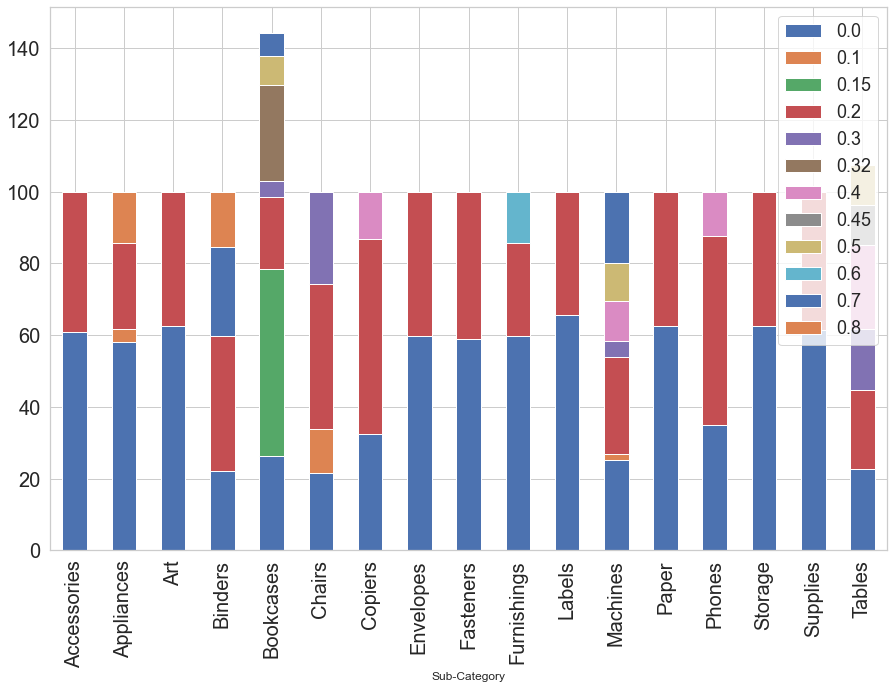

In [150]:
df_stack_bar1.plot.bar(x='Sub-Category',stacked=True, figsize=(15, 10))
plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [151]:
cust_ord_cnt = df_store.drop_duplicates(subset=['Order ID','Customer ID']).groupby('Customer ID')['Order ID'].count()
cust_ord_cnt[cust_ord_cnt == 1].sum()

12

In [152]:
df_store.drop_duplicates(subset='Customer ID')['Customer ID'].count()

793

**Checking retention of customers in each quarter starting from the year 2016**

In [153]:
df_store['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

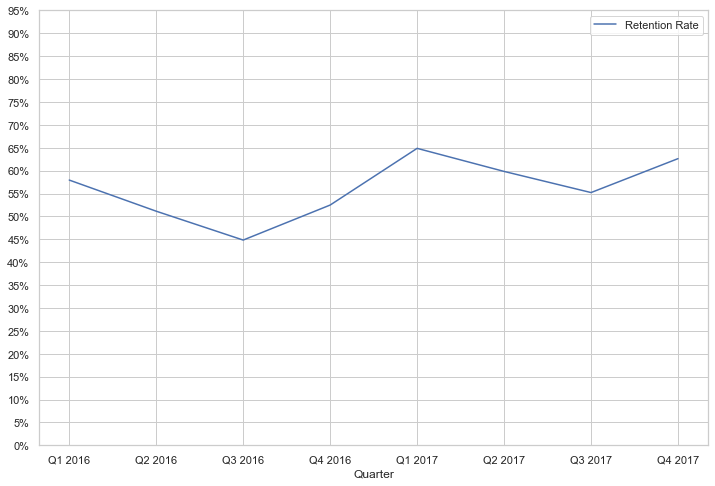

In [154]:
from datetime import datetime, timedelta
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import yticks

date_val = datetime(2016, 1, 1)

delta_24 = timedelta(days=24 * 30)  # no. of days in 24 months
delta_12 = timedelta(days=12 * 30)
delta_6 = timedelta(days=6 * 30)
delta_3 = timedelta(days=3 * 31)
end = datetime(2018, 1, 1)
idx = 0
retentions = []
while date_val < end:
    old_customers = df_store[(df_store['Order Date'] > (date_val - delta_24)) & (df_store['Order Date'] < (date_val - delta_12))]['Customer ID'].unique()
    recent_customers = df_store[(df_store['Order Date'] > (date_val - delta_6)) & (df_store['Order Date'] < date_val)]['Customer ID'].unique()
    retained_customers = np.intersect1d(old_customers, recent_customers)  # numpy.intersect1d--> Find the intersection of two arrays.    
    retentions.append([retained_customers.size * 100 / old_customers.size, date_val])
    date_val = date_val + delta_3  # change the quarter, by adding 3 months
    idx+= 1

df_retention = pd.DataFrame(retentions, columns=['Retention Rate' , 'Date'])
df_retention['Quarter'] = df_retention['Date'].dt.to_period('Q').dt.strftime('Q%q %Y')
ax = df_retention.plot.line(x='Quarter', y='Retention Rate', figsize=(12,8), yticks=range(0, 100, 5))
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
